# ImbalancedLearningRegression (0.0.0): Usage
---
## TomekLinks

Gloria(Xinzi) Hu, 300011200, xhu005@uottawa.ca \ Lingyi Kong, 300062668, lkong073@uottawa.ca \ Adapted from Nick Kunz's SMOGN package: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_1_beg.ipynb

## Installation

First, we install ImbalancedLearningRegression from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [ ]:
## suppress install output
##%%capture

## install pypi release
#!pip install smote

## install developer version
!pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git


  Cloning https://github.com/paobranco/ImbalancedLearningRegression.git to /tmp/pip-req-build-kka4qgm9
  Running command git clone -q https://github.com/paobranco/ImbalancedLearningRegression.git /tmp/pip-req-build-kka4qgm9
  Created wheel for ImbalancedLearningRegression: filename=ImbalancedLearningRegression-0.0.0-py3-none-any.whl size=117510 sha256=b3e2d73dc038819f377727462000385c81db40d3a128ce0f96c9f8dbe6470533
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6bo5y2c/wheels/89/80/c5/3b43c805c9eab7ff24db145fbb39077e4d23337f3f5d8e0173
Successfully built ImbalancedLearningRegression


## Dependencies
Next, we load the required dependencies. Here we import `tomeklinks` to later apply under-sampling by removing Tomek’s links for Regression. In addition, we use `pandas` for data handling,`matplotlib` and `seaborn` to visualize our results, and `ssl` to help read the dataframe from external resources.

In [ ]:
## load dependencies
## load libraries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import ImbalancedLearningRegression as iblr

## Data
Then we load our data. In this example, we use the College Data set, which can be found on the website for the main course textbook("An Introduction to Statistical Learning with Applications in R") James et al. http://www-bcf.usc.edu/~gareth/ISL/data.html. It contains a number of variables for 777 different universities and colleges in the US. In this case, we name our training set `college`.


In [ ]:
college = pd.read_csv(
    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/College.csv'
)


## Introduction to Undersampling Tomeklinks
Here we cover the focus of this example. We call the `tomeklinks` function from this package (`ImbalancedLearningRegression.tomeklinks`) and satisfy the minimum required arguments: `data` and `y`.

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `college` training set with follow input: `data = college`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'Grad.Rate'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input: `y = 'Grad.Rate'`

In [ ]:
## conduct smote
college_tomek = iblr.tomeklinks(
    ## main arguments
    data = college,  ## pandas dataframe
    y = "Grad.Rate",  ## string ('header name')
)

new_index: 100%|##########| 657/657 [00:00<00:00, 1710.11it/s]


**Note:**

In this example, the regions of interest within the response variable `y` are automatically determined by the box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. The values closer the median are considered "majority" values and are under-sampled.

If there are no box plot extremes contained in the reponse variable `y`, the argument `rel_method = manual` must be specified, and an input matrix must be placed into the argument `rel_ctrl_pts_rg` indicating the regions of rarity in `y`.

More information regarding the matrix input to the rel_ctrl_pts_rg argument and manual over-sampling can be found within the function's doc string, as well as in Nick Kunz's package SMOGN: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_3_adv.ipynb.

It is also important to mention that by default, `ImbalancedLearningRegression.tomeklinks` will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments `drop_na_col = False` and `drop_na_rows = False`.

In addition, there is an attribute that specific for the tomeklinks method which is `option`. It has 3 availble input value: `majority`, `minority`, and `both`. When `majority`, the method resample only the majority class; when `minority`, the method resample only the minority class; when `both`, the method resample both majority and minority classes.

## Results
After conducting under-sample the majority class(es) by randomly picking samples with or without replacement, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set decreased from 777 to 657, while the number of features (columns) did not change. 

Recall that `ImbalancedLearningRegression.random_under` automatically removes features containing missing values. In this case, no features contained missing values.

The reduction in observations were a result of under-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.




In [ ]:
## dimensions - original data 
college.shape

(777, 19)

In [ ]:
## dimensions - modified data
college_tomek.shape

(657, 19)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has not changed.

In [ ]:
## box plot stats - original data 
iblr.box_plot_stats(college['Grad.Rate'])['stats']

array([ 18.,  53.,  65.,  78., 100.])

In [ ]:
## box plot stats - modified data
iblr.box_plot_stats(college_tomek['Grad.Rate'])['stats']

array([ 18.,  53.,  66.,  78., 100.])

Plotting the results of both the original and modified training sets, the difference is small. We guess that it is because the number of the observations is not enough and there are only a few tomeklinks appear in the training set. Therefore, the number of removed observations are too small to make the plot produce significant change.

In this example, Tomeklinks under-sampled observations whose `'Grad.Rate'` was found to be a little closer to the median (those considered "majority").

This is the quickest implementation when the `y` values of interest in predicting may be unclear within a given dataset.



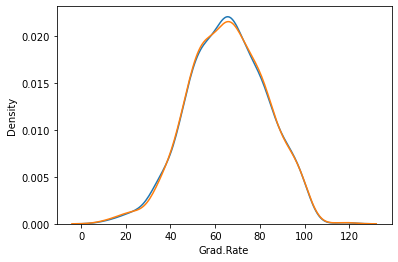

In [ ]:
## plot y distribution 
college_tomek.reset_index(inplace=True)

seaborn.kdeplot(college['Grad.Rate'], label="Original")
seaborn.kdeplot(college_tomek['Grad.Rate'], label="Modified")
plt.show()

## Conclusion
In this example, we covered the fundamentals of Tomeklinks. We utilized the College dataset to conduct under-sampling by removing Tomek’s links for Regression with the minimum required arguments. 

Tomeklinks over-sampled "minority" values and under-sampled "majority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.




## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

Gareth, J., Daniela, W., Trevor, H., & Robert, T. (2013). An introduction to statistical learning: with applications in R. Spinger.

Ai-jun, L., & Peng, Z. (2020, June). Research on Unbalanced Data Processing Algorithm Base Tomeklinks-Smote. In Proceedings of the 2020 3rd International Conference on Artificial Intelligence and Pattern Recognition (pp. 13-17).

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index. https://pypi.org/project/smogn.